In [1]:
import numpy as np
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors

In [86]:
model = KeyedVectors.load('word2vec-google-news-300.model')

In [52]:
def most_similar( model , word ) :
    return model.most_similar( word , topn = 3 ) 

In [87]:
X_pca = PCA(n_components=100).fit_transform(model.vectors)

#np.save('word2vec-google-news-05-pca.model.npy', X_pca)
model.vectors = X_pca
model.save('word2vec-google-news-100-pca.model')


In [88]:
wv = KeyedVectors.load('./word2vec-google-news-100-pca.model')


In [89]:
wv.vectors = wv.vectors.astype('float16')
# Save the new model
wv.save('./word2vec-google-news-100-pca-fp16.model')

In [74]:
wv = KeyedVectors.load('./word2vec-google-news-100-pca-fp16.model')

In [91]:
new_wv = KeyedVectors(vector_size=100)

# Add all words with their PCA-reduced vectors
words = list(wv.index_to_key)
vectors = wv.vectors  # These should already be 100-dim from your PCA

new_wv.add_vectors(words, vectors)



In [92]:
new_wv.save('./word2vec-google-news-100-pca-fp16_completed.model')

In [93]:
print ( wv.vectors.dtype ) 

float16


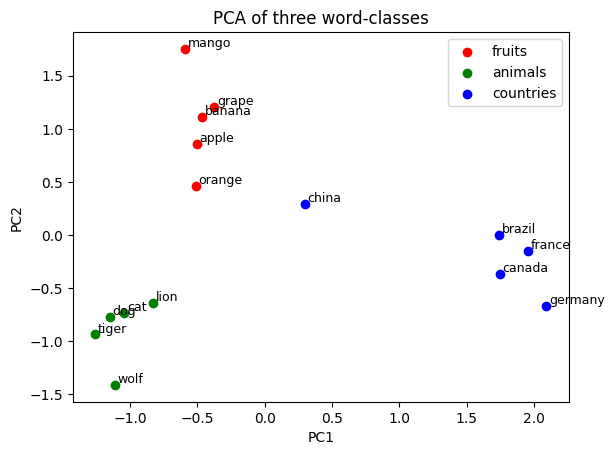

In [95]:
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Load your (full-dim) model

# 2) Define three distinct classes
classes = {
    'fruits':   ['apple','banana','orange','grape','mango'],
    'animals':  ['dog','cat','lion','tiger','wolf'],
    'countries':['france','germany','china','brazil','canada']
}

# 3) Gather vectors & labels
vecs, labels, words = [], [], []
for label, word_list in classes.items():
    for w in word_list:
        vecs.append( wv[w] )
        labels.append(label)
        words.append(w)

# 4) PCA → 2D
X2 = PCA(n_components=2).fit_transform(vecs)

# 5) Plot
colors = {'fruits':'r','animals':'g','countries':'b'}
for cls in classes:
    idx = [i for i,lab in enumerate(labels) if lab==cls]
    plt.scatter(X2[idx,0], X2[idx,1], c=colors[cls], label=cls)
    for i in idx:
        plt.text(X2[i,0]+0.02, X2[i,1]+0.02, words[i], fontsize=9)

plt.legend()
plt.title("PCA of three word-classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


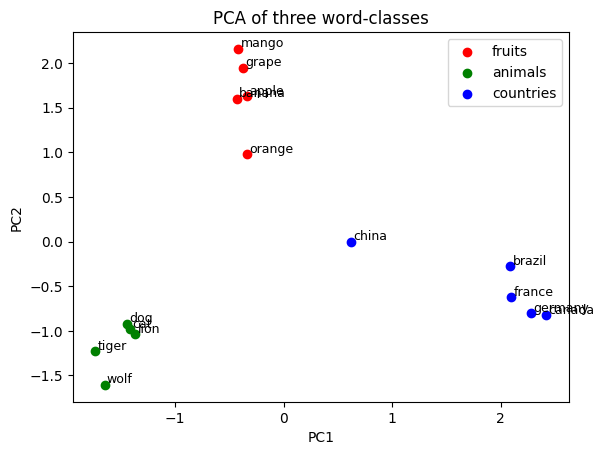

In [77]:
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Load your (full-dim) model

# 2) Define three distinct classes
wv = model 
classes = {
    'fruits':   ['apple','banana','orange','grape','mango'],
    'animals':  ['dog','cat','lion','tiger','wolf'],
    'countries':['france','germany','china','brazil','canada']
}

# 3) Gather vectors & labels
vecs, labels, words = [], [], []
for label, word_list in classes.items():
    for w in word_list:
        vecs.append( wv[w] )
        labels.append(label)
        words.append(w)

# 4) PCA → 2D
X2 = PCA(n_components=2).fit_transform(vecs)

# 5) Plot
colors = {'fruits':'r','animals':'g','countries':'b'}
for cls in classes:
    idx = [i for i,lab in enumerate(labels) if lab==cls]
    plt.scatter(X2[idx,0], X2[idx,1], c=colors[cls], label=cls)
    for i in idx:
        plt.text(X2[i,0]+0.02, X2[i,1]+0.02, words[i], fontsize=9)

plt.legend()
plt.title("PCA of three word-classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


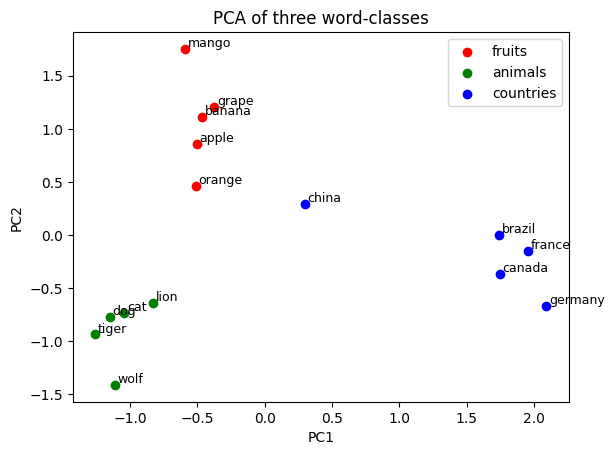

In [83]:
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Load your (full-dim) model

# 2) Define three distinct classes
classes = {
    'fruits':   ['apple','banana','orange','grape','mango'],
    'animals':  ['dog','cat','lion','tiger','wolf'],
    'countries':['france','germany','china','brazil','canada']
}

# 3) Gather vectors & labels
vecs, labels, words = [], [], []
for label, word_list in classes.items():
    for w in word_list:
        vecs.append( new_wv[w] )
        labels.append(label)
        words.append(w)

# 4) PCA → 2D
X2 = PCA(n_components=2).fit_transform(vecs)

# 5) Plot
colors = {'fruits':'r','animals':'g','countries':'b'}
for cls in classes:
    idx = [i for i,lab in enumerate(labels) if lab==cls]
    plt.scatter(X2[idx,0], X2[idx,1], c=colors[cls], label=cls)
    for i in idx:
        plt.text(X2[i,0]+0.02, X2[i,1]+0.02, words[i], fontsize=9)

plt.legend()
plt.title("PCA of three word-classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
